<h1>PCA & Eigenfaces </h1>
<p>In this question, you are expected to compress face images using PCA and decompress eigenfaces back to
restore original images (please mind that unless you use ALL eigenfaces, you will lose some information
while reconstructing the original images). For this question, you will use LFW (Labeled Faces in the Wild)
dataset [1] which is provided to you within homework zip le as lfwdataset folder. To reduce computa-
tional time, only rst 1000 images are included. Each image le is named using the person's name.</p>
<p>An eigenface is an eigenvector of the normalized data matrix X
with each row denoting a dierent image
and each column consists of the normalized pixel intensities. To obtain eigenfaces, rst you need to create
a data matrix X by reading each image that is given to you. Then, you have to subtract mean from X
using the row axis to obtain X
. Then, extract eigenvalues of the X
T X
matrix. After sorting eigenvalues
1
in descending order, starting from the highest one, you have to compute eigenvector corresponding to that
eigenvalue. First k eigenvectors you got this way are the rst k eigenfaces. You may use built-in PCA
functions to obtain eigenfaces.</p>

<strong>Question 1.1</strong> What changes do you need to make in order to obtain eigenfaces using SVD instead
of PCA? How are these 2 methods related?

<strong>Answer: </strong>We had to decompose our matrix into a product of three matrices which are U (orthogonal matric) , D (Diagonal matrix) and V (orthogonal matrix). These two methods are related with each other because they both enable to find PCA vectors. However, PCA is computaionally expensive and obtaining PCA vectors with SVD method is less computaionally expensive.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
cwd = os.getcwd()

# defining the constants
numOfImages = 1000
width = 64
height = 64

# retrieving images from directory.
imagesName = np.array([x[2] for x in os.walk(os.path.join(cwd, "data"))])[0]
images = np.zeros((1000, 64, 64))

for index in range(numOfImages):
    images[index] = plt.imread(os.path.join(cwd, "data", imagesName[index]))

In [2]:
# converting the image matris to 4096 
imagesUpdated = np.zeros((numOfImages, 4096))
for i in range(numOfImages):
    imagesUpdated[i] = images[i].ravel()
images = imagesUpdated.T

In [3]:
# calculating mean of the images matric.
imagesMean = (images.mean(axis=1)).reshape(-1,1)
# normalising images
normalisedImages = images - imagesMean

In [4]:
# calculating eigen values and eigen vectors
covarianceMatrix = (normalisedImages).dot(normalisedImages.T)
eigenValues, eigenVectors = np.linalg.eig(covarianceMatrix)

In [5]:
# sorting the eigenvalues and eigenvectors in descending order
idx = np.argsort(-eigenValues) 
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]

<strong>Question 1.2</strong> Obtain first k eigenfaces where k 2 f16; 32; 64; 128; 256; 512; 1024; 2048; 4096g and
for each of these k values, and the percentage of the variance explained. Then, plot k vs. explained variance
graph and comment on it. Describe what is the significance of explained variance and how you can obtain
that value.

<strong>Answer: </strong>As we increase the number of pca components, the explained variance increases and if we include all of the pca components, total variance will be covered eventually. The explained variance value con be obtained by summing up the corresponding eigen values and dividing them with sum of all of the eigen values. Eigen value is kind of a measure that indicates how much variance is covered by the related eigen vector.

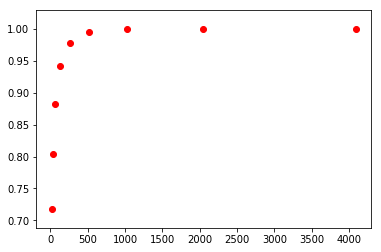

For k = 16	 -------> 	71% of variance is covered.
For k = 32	 -------> 	80% of variance is covered.
For k = 64	 -------> 	88% of variance is covered.
For k = 128	 -------> 	94% of variance is covered.
For k = 256	 -------> 	97% of variance is covered.
For k = 512	 -------> 	99% of variance is covered.
For k = 1024	 -------> 	100% of variance is covered.
For k = 2048	 -------> 	100% of variance is covered.
For k = 4096	 -------> 	100% of variance is covered.


In [6]:
kValues = [ 16, 32, 64, 128, 256, 512, 1024, 2048, 4096 ]
varianceCovered = np.zeros(9)

i = 0
for k in kValues:
    totalVariance = eigenValues.sum()
    coveredVariance = eigenValues[:k].sum()
    temp = (coveredVariance / totalVariance).real
    varianceCovered[i] = temp.real
    i += 1
    

# drawing the graph that indicates the covered variance
plt.scatter(kValues, varianceCovered, color='red')
plt.show()

# printing out the covered variance
varianceCovered = (varianceCovered * 100).astype(int)
for i in range(9):
    print("For k = " + str(kValues[i]) + "\t -------> \t" + str(varianceCovered[i]) + "% of variance is covered.")

In [7]:
def apply_pca(numberOfComponents): 
    # taking only the top n components
    correspondingEigenValues  = eigenValues[:numberOfComponents]
    correspondingEigenVectors = eigenVectors[:,:numberOfComponents]
    # projection of the data
    correspondingProjection = np.dot(correspondingEigenVectors.T, normalisedImages)
    return correspondingEigenVectors, correspondingProjection, correspondingEigenValues

<strong>Question 1.3</strong> Describe how you can reconstruct an original image using eigenfaces that are
obtained using PCA. In a 5x10 grid, plot original photos of first 6 people (6 photos: Aaron Eckhart, Aaron
Guiel, Aaron Patterson, Aaron Peirsol, Aaron Pena and Aaron Sorkin) on the firrst row, first 6 eigenfaces
on the second row, reconstructed images of the 6 people specified above on the third row using first 32
eigenfaces, reconstructed images of the 6 people specified above on the fourth row using first 128 eigenfaces
and the reconstructed images of the 6 people specified above on the fifth row using first 512 eigenfaces. What
happens when you increase the number of eigenfaces?

<strong>Answer: </strong> As we increase the number of eigenfaces, we can cover the variance more and get more detail. Hence, the images will get more simiar to the initial ones because the variance is covered more and more as we increase the number of eigenfaces.



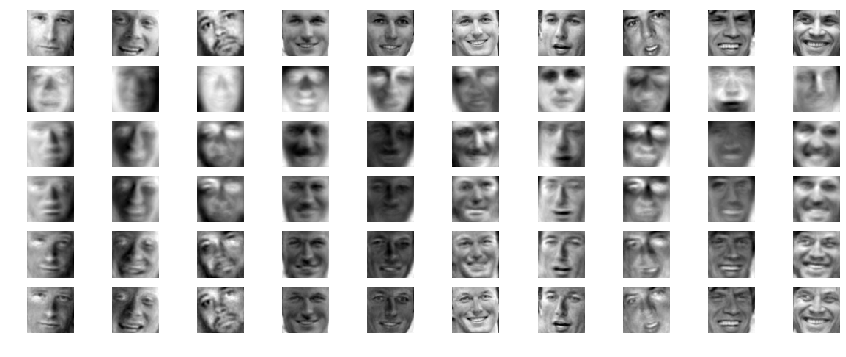

<Figure size 1080x1080 with 0 Axes>

In [8]:
fig = plt.figure(figsize=(15, 10))

for i in range(6):    
    # displaying the first 5 images.
    if i == 0:
        for j in range(10):     
            plt.subplot(10, 10, (10 * i) + j+1);
            plt.imshow(images[:,j].reshape(64,64), cmap='gray')
            plt.axis('off')
    
    # displaying the first 5 eigen faces.
    if i == 1:
         for j in range(10):     
            fig.add_subplot(10, 10, (10 * i) + j+1);
            plt.imshow(eigenVectors[:,j].reshape(64,64).real, cmap='gray')
            plt.axis('off')
    
    # displaying the first 5 images 
    # in 16 dimensions through pca.
    if i == 2:
        evectors, proj, evalues = apply_pca(16)
        constructedImages = np.dot(evectors,proj) + np.mean(images, axis=0)
        for j in range(10):
            fig.add_subplot(10, 10, (10 * i) + j+1);
            plt.imshow(constructedImages[:,j].reshape(64,64).real, cmap='gray')
            plt.axis('off')

    # displaying the first 5 images 
    # in 32 dimensions through pca.
    if i == 3:
        evectors, proj, evalues = apply_pca(32)
        constructedImages = np.dot(evectors,proj) + np.mean(images, axis=0)
        for j in range(10):
            fig.add_subplot(10, 10, (10 * i) + j+1);
            plt.imshow(constructedImages[:,j].reshape(64,64).real, cmap='gray')
            plt.axis('off')

    # displaying the first 5 images 
    # in 128 dimensions through pca.
    if i == 4:
        evectors, proj, evalues = apply_pca(128)
        constructedImages = np.dot(evectors,proj) + np.mean(images, axis=0)
        for j in range(10):
            fig.add_subplot(10, 10, (10 * i) + j+1);
            plt.imshow(constructedImages[:,j].reshape(64,64).real, cmap='gray')    
            plt.axis('off')
            
    # displaying the first 5 images 
    # in 512 dimensions through pca.
    if i == 5:
        evectors, proj, evalues = apply_pca(512)
        constructedImages = np.dot(evectors,proj) + np.mean(images, axis=0)
        for j in range(10):
            fig.add_subplot(10, 10, (10 * i) + j+1);
            plt.imshow(constructedImages[:,j].reshape(64,64).real, cmap='gray')   
            plt.axis('off')
        
plt.figure(figsize=(15,15))    
plt.show()

<strong>Question 1.4:</strong> If we would like to keep 95% of the original dataset variance, what would be the
minimum number of eigenfaces required? For that many eigenfaces, assuming a single pixel is contained
within an integer and both integers and 
oats are 4 bytes, what is the compression ratio (uncompressed
size / compressed size) when 95% of the variance is kept and assuming you are just keeping the necessary
information required to reconstruct each image?


<strong>Answer: </strong>150 eigen vectors are required to keep  95% of the original dataset variance. The compression ratio is defined as compresion_rate = (original_file_size) / (2 * pricipal_components + 1). Hence compression rate is: <br> <strong> compression rate = (4096) / (2 * 150 + 1) = 13.6 </strong>

In [9]:
totalVariance = eigenValues.sum()
coveredVariance = eigenValues[:145].sum()
cVariancePercentage = (coveredVariance / totalVariance).real
print("For k = " + str(150) + " -------> " + str(cVariancePercentage) + "% of variance is covered.")

For k = 150 -------> 0.9500069363721166% of variance is covered.
